<a href="https://colab.research.google.com/github/nsalazard/EFM-analisis-de-datos-/blob/main/EFM_S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gspread
import pandas as pd
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm, linregress
import matplotlib.colors as mcolors
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1qQEcKEodrIHdskoSy9HRgPAKHVfMMP3zG8-lqirZErU/edit#gid=0')
worksheet=wb.worksheet('Helio')
rows = worksheet.get_all_values()
d1=pd.DataFrame(rows)
titles=pd.DataFrame(rows)
d1.columns = d1.iloc[0]
titles=titles.iloc[0:1]
d1 = d1.iloc[1:]
d1.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,y[cm],Error1,theta[rad],Error2,lambda[mm],Error,1/λ[1/m],,q2p2,D[cm],42
1,21,0.5,0.46,0.01,0.00045,0.00001,2.24E+06,5.95E+04,0.23,d[mm],0.001
2,22.5,0.5,0.49,0.01,0.00047,0.00001,2.12E+06,5.34E+04,0.23,,
3,23.9,0.5,0.52,0.01,0.00049,0.00001,2.02E+06,4.87E+04,0.22,,
4,24.5,0.5,0.53,0.01,0.00050,0.00001,1.98E+06,4.69E+04,0.21,,
5,30.5,0.5,0.63,0.01,0.00059,0.00001,1.70E+06,3.45E+04,0.19,,


In [ ]:
nombres=d1.columns[0:8]
for name in nombres:
  d1[name]= pd.to_numeric(d1[name])

#**Helio**

TypeError: ignored

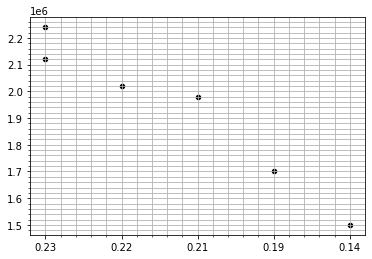

In [ ]:
valx1=d1.loc[:6,"q2p2"]
valy1=d1.loc[:6,"1/λ[1/m]"]
x1=valx1.values 
y1=valy1.values

#plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="black",s=20)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color="mediumvioletred",label='$1/λ$= %2.2E * $(q^{-2} - p^{-2})$ + %2.2E, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("1/λ[$1/m$]")
plt.xlabel("$q^{-2} - p^{-2}$")
plt.title("$1/λ$ vs ($q^{-2} - p^{-2}$)", fontsize=12)
plt.suptitle("$Helio$", fontsize=14,  fontname="Times New Roman Bold")
plt.subplots_adjust(top=0.85)
#plt.ticklabel_format(useOffset=False, style='plain')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#INCERTIDUMBRES
print("Ajuste, pendiente  %4.4E +-  %4.4E, intercept  %4.4E +-  %4.4E "%(gradient1,er_m,intercept1, er_b)) 
print("$R^2$ = %4.3f" % abs(r_value1))

#**Hidrógeno**

In [ ]:
worksheet2=wb.worksheet('hidrogeno')
rows2 = worksheet2.get_all_values()
d2=pd.DataFrame(rows2)
titles2=pd.DataFrame(rows2)
d2.columns = d2.iloc[0]
titles2=titles2.iloc[0:1]
d2 = d2.iloc[1:]
d2.head()

names=d2.columns[0:9]
for name in names:
  d2[name]= pd.to_numeric(d2[name])

valx1=d2.loc[0:4,"q2p2"]
valy1=d2.loc[0:4,"1/λ[1/m]"]
x1=valx1.values 
y1=valy1.values

#plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="black",s=20)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color="dodgerblue",label='$1/λ$= %2.2E * $(q^{-2} - p^{-2})$ + %2.2E, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("1/λ[$1/m$]")
plt.xlabel("$q^{-2} - p^{-2}$")
plt.title("$1/λ$ vs ($q^{-2} - p^{-2}$)", fontsize=12)
plt.suptitle("$Hidrógeno$", fontsize=14,  fontname="Times New Roman Bold")
plt.subplots_adjust(top=0.85)
#plt.ticklabel_format(useOffset=False, style='plain')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#INCERTIDUMBRES
print("Ajuste, pendiente  %4.4E +-  %4.4E, intercept  %4.4E +-  %4.4E "%(gradient1,er_m,intercept1, er_b)) 
print("$R^2$ = %4.3f" % abs(r_value1))
error = abs(1.097 -1.0842)/1.097
print("error relativo porcentual = ", error)


ValueError: ignored

#**Mercurio**

TypeError: ignored

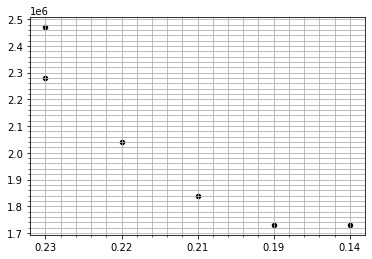

In [ ]:
worksheet3=wb.worksheet('Mercurio')
rows3 = worksheet3.get_all_values()
d3=pd.DataFrame(rows3)
titles3=pd.DataFrame(rows3)
d3.columns = d3.iloc[0]
titles3=titles3.iloc[0:1]
d3 = d3.iloc[1:]
d3.head()

names=d3.columns[0:8]
for name in names:
  d3[name]= pd.to_numeric(d3[name])

valx1=d3.loc[0:6,"q2p2"]
valy1=d3.loc[0:6,"1/λ[1/m]"]
x1=valx1.values 
y1=valy1.values

#plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="black",s=20)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color="royalblue",label='$1/λ$= %2.2E * $(q^{-2} - p^{-2})$ + %2.2E, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("1/λ[$1/m$]")
plt.xlabel("$q^{-2} - p^{-2}$")
plt.title("$1/λ$ vs ($q^{-2} - p^{-2}$)", fontsize=12)
plt.suptitle("$Mercurio$", fontsize=14,  fontname="Times New Roman Bold")
plt.subplots_adjust(top=0.85)
#plt.ticklabel_format(useOffset=False, style='plain')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#INCERTIDUMBRES
print("Ajuste, pendiente  %4.4E +-  %4.4E, intercept  %4.4E +-  %4.4E "%(gradient1,er_m,intercept1, er_b)) 
print("$R^2$ = %4.3f" % abs(r_value1))

#**Neon**

TypeError: ignored

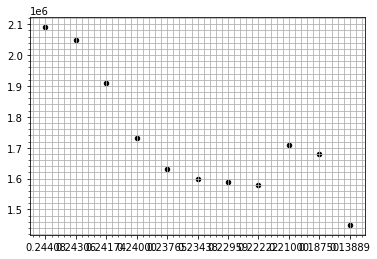

In [ ]:
worksheet4=wb.worksheet('Neon')
rows4 = worksheet4.get_all_values()
d4=pd.DataFrame(rows4)
titles3=pd.DataFrame(rows4)
d4.columns = d4.iloc[0]
titles4=titles.iloc[0:1]
d4 = d4.iloc[1:]
d4.head()

names=d4.columns[0:8]
for name in names:
  d4[name]= pd.to_numeric(d4[name])

valx1=d4.loc[0:11,"q2p2"]
valy1=d4.loc[0:11,"1/λ[1/m]"]
x1=valx1.values 
y1=valy1.values

#plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="black",s=20)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color="royalblue",label='$1/λ$= %2.2E * $(q^{-2} - p^{-2})$ + %2.2E, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left") # lower left
plt.ylabel("1/λ[$1/m$]")
plt.xlabel("$q^{-2} - p^{-2}$")
plt.title("$1/λ$ vs ($q^{-2} - p^{-2}$)", fontsize=12)
plt.suptitle("$Neón$", fontsize=14,  fontname="Times New Roman Bold")
plt.subplots_adjust(top=0.85)
#plt.ticklabel_format(useOffset=False, style='plain')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#INCERTIDUMBRES
print("Ajuste, pendiente  %4.4E +-  %4.4E, intercept  %4.4E +-  %4.4E "%(gradient1,er_m,intercept1, er_b)) 
print("$R^2$ = %4.3f" % abs(r_value1))

In [ ]:
#FUNCIONES
def f1(x,a,b):
  return a*x+b

def ERROR(x,y,m,b):
  N = np.size(x)
  Sx,Sy,Sxx,Syy,e,em,eb,z = 0,0,0,0,0,0,0,0
  for i in range (N-1):
    Sx += x[i]
    Sy += y[i] 
    Sxx += x[i]*x[i]
    Syy += y[i]*y[i]
    z += (b+ m*x[i] - y[i])**2
  e = np.sqrt(z/((N*Sxx -Sx*Sx)*(N-2)))
  em = np.sqrt(N)*e
  eb = np.sqrt(Sxx)*e

  return (em, eb)

def gaussiana(x, a, b, c):
	return a * np.exp(-((x-b)**2)/(c))